<a href="https://colab.research.google.com/github/moon1z10/mystuff/blob/main/ELO%EC%99%80_Glicko_%EB%9E%AD%ED%82%B9_%EC%8B%9C%EC%8A%A4%ED%85%9C%EC%9D%98_%EC%B0%A8%EC%9D%B4%EB%A5%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 게임을 통해 ELO와 Glicko 랭킹 시스템의 차이를 시각화해보겠습니다. 먼저, 게임을 시뮬레이션하고 ELO와 Glicko 점수를 계산하는 코드와 결과를 시각화하는 과정을 구글 Colab에서 진행해보겠습니다.

## Game

매우 간단한 1:1 대결 게임을 가정한 것입니다. 여기서 게임의 결과는 무작위로 결정됩니다. 각 경기 결과는 다음 세 가지 중 하나로 결정됩니다:

Player A 승리 (result = 1)
Player B 승리 (result = 0)
무승부 (result = 0.5)
각 시뮬레이션은 1000번의 게임을 수행하여, 각 게임 이후에 ELO와 Glicko 시스템에서 두 플레이어의 점수를 업데이트합니다. 이를 통해 두 시스템의 작동 방식과 점수 변화 양상을 비교합니다.

## 시뮬레이션
- 시뮬레이션 횟수: 각 시스템에서 1000번의 게임을 시뮬레이션.

이를 통해 ELO와 Glicko 시스템의 점수 변화를 비교하고, 각 시스템의 특징을 시각적으로 확인할 수 있습니다.

### 시뮬레이션 과정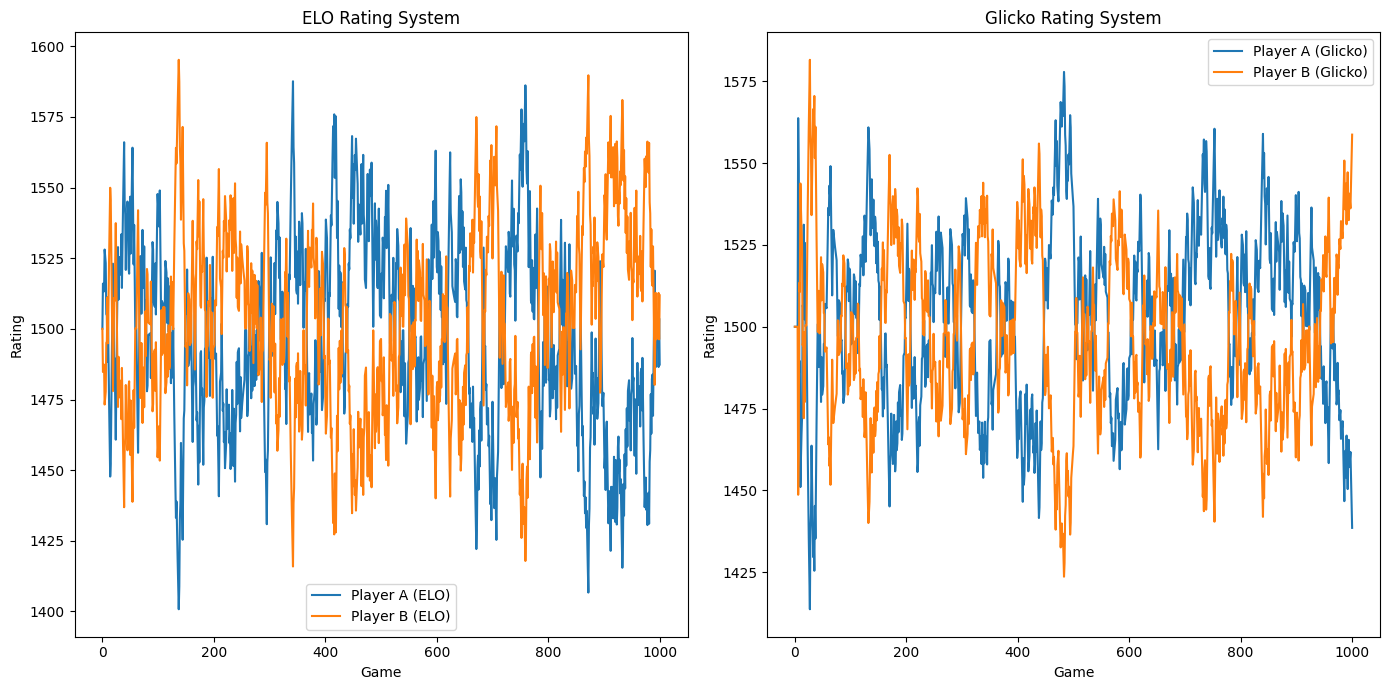
1. ELO 랭킹 시스템: 두 플레이어의 초기 점수는 1500점으로 시작합니다. 각 게임 결과에 따라 ELO 공식을 사용해 점수를 업데이트합니다.
2. Glicko 랭킹 시스템: 두 플레이어의 초기 점수는 1500점이며, 초기 변동성(RD, Rating Deviation)은 Glicko2 라이브러리의 기본값을 사용합니다. 각 게임 결과에 따라 Glicko 공식을 사용해 점수를 업데이트합니다.
3. 두 시스템 모두 1000번의 게임을 진행하며, 각 게임 이후에 점수를 기록하여 나중에 시각화합니다.

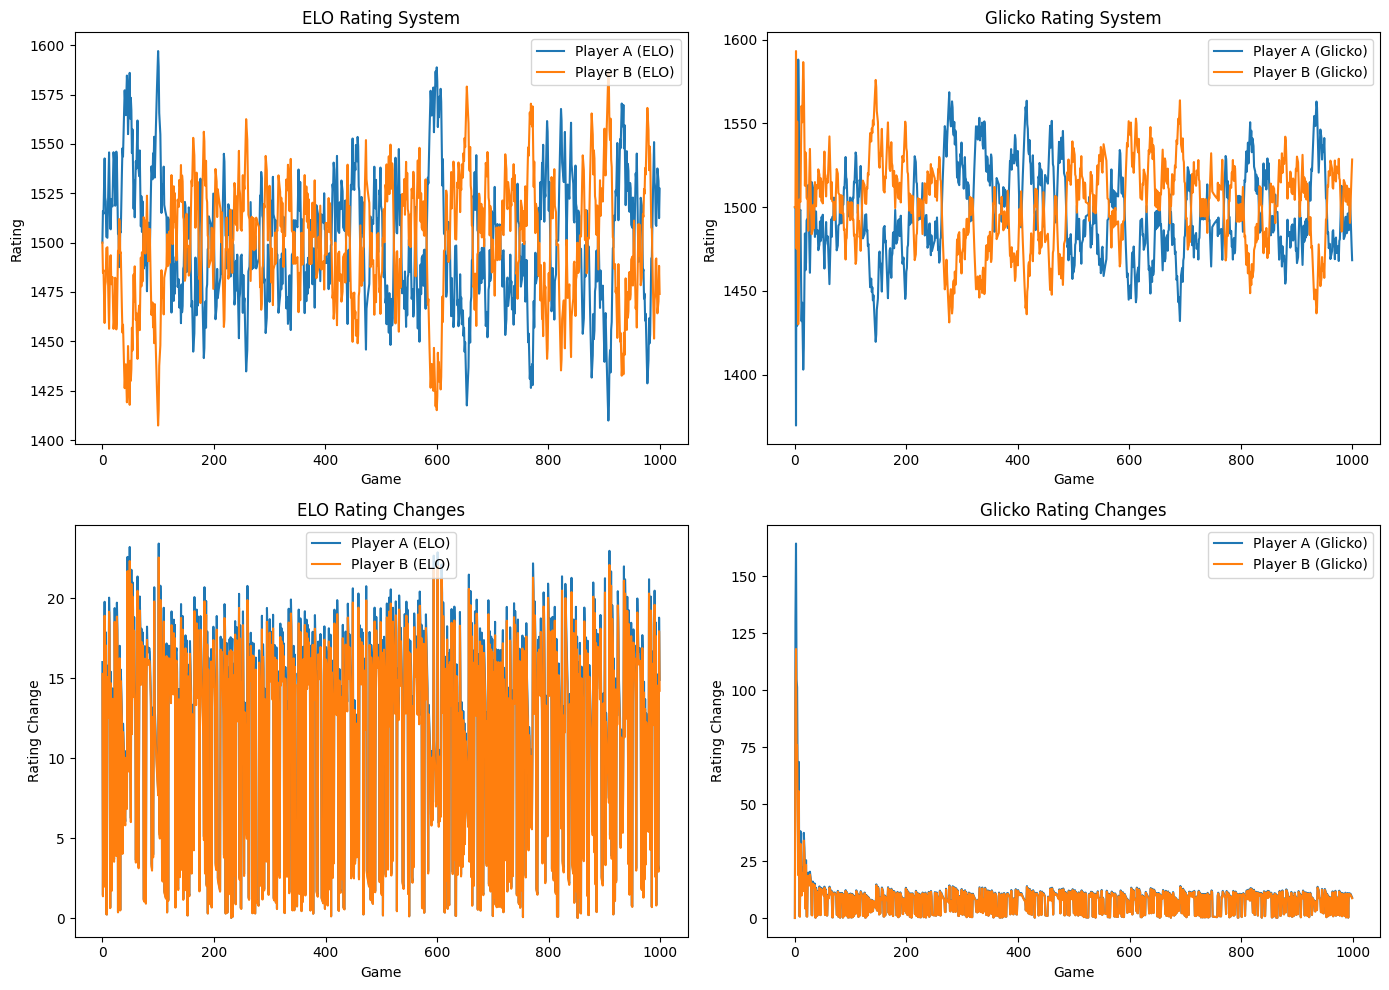

In [10]:
!pip install glicko2 matplotlib
import numpy as np
import matplotlib.pyplot as plt
from glicko2 import Player

class EloPlayer:
    def __init__(self, rating=1500):
        self.rating = rating

    def update_rating(self, opponent_rating, result, k=32):
        expected_score = 1 / (1 + 10 ** ((opponent_rating - self.rating) / 400))
        self.rating += k * (result - expected_score)

def simulate_elo_games(num_games=1000):
    player_a = EloPlayer()
    player_b = EloPlayer()
    ratings_a = [player_a.rating]
    ratings_b = [player_b.rating]

    for _ in range(num_games):
        # Simulate game result: 1 if A wins, 0 if B wins, 0.5 for draw
        result = np.random.choice([1, 0, 0.5])
        player_a.update_rating(player_b.rating, result)
        player_b.update_rating(player_a.rating, 1 - result)
        ratings_a.append(player_a.rating)
        ratings_b.append(player_b.rating)

    return ratings_a, ratings_b

def simulate_glicko_games(num_games=1000):
    player_a = Player()
    player_b = Player()
    ratings_a = [player_a.rating]
    ratings_b = [player_b.rating]

    for _ in range(num_games):
        result = np.random.choice([1, 0, 0.5])
        player_a.update_player([player_b.rating], [player_b.rd], [result])
        player_b.update_player([player_a.rating], [player_a.rd], [1 - result])
        ratings_a.append(player_a.rating)
        ratings_b.append(player_b.rating)

    return ratings_a, ratings_b

def calculate_changes(ratings):
    return [abs(ratings[i] - ratings[i - 1]) for i in range(1, len(ratings))]

def plot_ratings_with_changes(elo_ratings_a, elo_ratings_b, glicko_ratings_a, glicko_ratings_b):
    elo_changes_a = calculate_changes(elo_ratings_a)
    elo_changes_b = calculate_changes(elo_ratings_b)
    glicko_changes_a = calculate_changes(glicko_ratings_a)
    glicko_changes_b = calculate_changes(glicko_ratings_b)

    plt.figure(figsize=(14, 10))

    # Plot ELO ratings
    plt.subplot(2, 2, 1)
    plt.plot(elo_ratings_a, label='Player A (ELO)')
    plt.plot(elo_ratings_b, label='Player B (ELO)')
    plt.xlabel('Game')
    plt.ylabel('Rating')
    plt.title('ELO Rating System')
    plt.legend()

    # Plot Glicko ratings
    plt.subplot(2, 2, 2)
    plt.plot(glicko_ratings_a, label='Player A (Glicko)')
    plt.plot(glicko_ratings_b, label='Player B (Glicko)')
    plt.xlabel('Game')
    plt.ylabel('Rating')
    plt.title('Glicko Rating System')
    plt.legend()

    # Plot ELO changes
    plt.subplot(2, 2, 3)
    plt.plot(elo_changes_a, label='Player A (ELO)')
    plt.plot(elo_changes_b, label='Player B (ELO)')
    plt.xlabel('Game')
    plt.ylabel('Rating Change')
    plt.title('ELO Rating Changes')
    plt.legend()

    # Plot Glicko changes
    plt.subplot(2, 2, 4)
    plt.plot(glicko_changes_a, label='Player A (Glicko)')
    plt.plot(glicko_changes_b, label='Player B (Glicko)')
    plt.xlabel('Game')
    plt.ylabel('Rating Change')
    plt.title('Glicko Rating Changes')
    plt.legend()

    plt.tight_layout()
    plt.show()

elo_ratings_a, elo_ratings_b = simulate_elo_games()
glicko_ratings_a, glicko_ratings_b = simulate_glicko_games()

plot_ratings_with_changes(elo_ratings_a, elo_ratings_b, glicko_ratings_a, glicko_ratings_b)




## 비교 및 해석
1. 점수 변동:

- ELO 랭킹 시스템에서는 점수가 비교적 일정하게 변동하는 것을 볼 수 있습니다. 게임 결과에 따라 점수가 오르고 내리며, 변화 폭은 상대적으로 일정합니다.
- Glicko 랭킹 시스템에서는 점수 변화가 더 크게 나타날 수 있으며, 특히 초기 게임에서는 변동성이 큽니다. 이는 Glicko 시스템이 점수의 신뢰도를 나타내는 변동성(RD)을 함께 고려하기 때문입니다.

2. 랭킹 안정화:

- ELO 시스템에서는 게임이 진행될수록 점수가 일정 범위 내에서 안정화되는 경향이 있습니다.
- Glicko 시스템에서는 초기 변동성이 크지만, 게임이 진행되면서 점수가 점차 안정화됩니다. 이는 변동성(RD)이 줄어들면서 점수 변화가 적어지기 때문입니다.

3. 점수 변화 패턴:

- ELO 시스템의 경우, 점수 변화가 상대적으로 일정하게 나타납니다.
- Glicko 시스템은 점수 변동이 더 크게 나타날 수 있으며, 플레이어가 오랜 기간 경기를 하지 않으면 변동성이 다시 커질 수 있습니다.

## 결론
- ELO 시스템은 간단하고 일정한 점수 변화를 제공하여 빠르게 점수를 계산하고 - 업데이트할 수 있습니다.
- Glicko 시스템은 점수의 신뢰도를 고려하여 초기 변동성이 크지만, 더 정확한 랭킹을 제공할 수 있습니다. 게임을 자주 하지 않는 플레이어의 점수를 보다 정확하게 유지할 수 있습니다.